# "Introduction to clustering"

- toc: false 
- comments: false
- layout: post

In this tutorial we will see some libraries of scikit for clustering. You can read more about clustering in SciKit here:

http://scikit-learn.org/stable/modules/clustering.html

In [1]:
import numpy as np
import scipy as sp
import scipy.sparse as sp_sparse
import scipy.spatial.distance as sp_dist

import matplotlib.pyplot as plt

import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from sklearn import preprocessing
import sklearn.cluster as sk_cluster
import sklearn.feature_extraction.text as sk_text


import scipy.cluster.hierarchy as hr

import time
import seaborn as sns

%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


Generate data from Gaussian distributions. 

More on data generation here: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

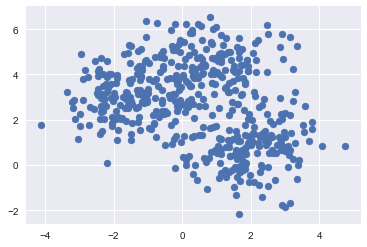

In [2]:
centers = [[1,1], [-1, -1], [1, -1]]
X, true_labels = sk_data.make_blobs(n_samples=500, centers=3, n_features=2,center_box=(-10.0, 10.0),random_state=0)
#X, true_labels = sk_data.make_blobs(n_samples=500, centers=centers, n_features=2,center_box=(-10.0, 10.0),cluster_std = 0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [3]:
print(type(X))
print(true_labels)

<class 'numpy.ndarray'>
[0 2 2 0 0 0 0 2 2 0 2 2 2 2 0 0 1 0 2 0 1 1 1 2 0 2 1 2 0 2 2 0 0 0 1 1 1
 1 1 1 2 0 0 1 1 0 1 0 2 2 0 0 0 0 2 2 1 1 0 2 1 2 1 1 1 2 0 1 2 0 2 0 0 2
 1 2 1 1 1 0 0 0 2 0 2 1 2 2 2 2 0 0 1 0 2 1 2 2 2 0 1 2 2 0 0 1 0 1 0 1 0
 0 1 2 2 1 2 1 1 2 2 0 2 2 2 0 2 0 2 0 1 0 2 1 0 1 2 2 1 0 0 2 2 1 0 0 0 1
 1 0 1 0 0 0 1 0 2 1 2 0 1 1 2 2 2 1 0 1 0 1 2 2 1 0 0 2 2 1 1 1 1 1 2 2 1
 1 0 1 0 2 2 0 1 1 0 2 1 0 2 1 2 1 0 0 2 1 1 1 2 2 0 1 1 2 2 0 2 0 2 2 1 2
 1 1 0 0 0 1 2 0 0 2 2 1 2 2 0 1 0 0 0 1 1 1 0 2 2 2 2 2 1 2 2 0 2 2 0 1 2
 1 1 0 0 1 1 0 2 1 2 1 1 2 1 0 0 1 0 1 1 1 1 2 1 0 0 0 0 2 2 1 1 2 2 0 0 1
 2 0 2 1 0 1 2 1 0 2 0 1 0 2 1 2 2 0 0 0 1 2 2 0 0 1 2 1 0 0 1 1 0 2 1 0 1
 2 1 1 0 2 0 2 1 2 1 0 0 0 1 0 0 2 1 0 2 2 2 0 1 1 1 2 0 1 2 0 0 0 2 0 2 0
 2 2 0 2 2 2 2 1 1 2 1 2 2 2 2 0 0 0 1 2 0 1 0 1 0 1 2 2 0 2 1 0 1 2 2 0 1
 2 1 2 0 0 0 1 2 0 0 1 2 2 0 2 1 0 2 0 1 0 2 0 0 1 0 0 0 0 1 0 1 2 1 1 0 2
 1 2 1 2 1 0 2 1 1 1 1 1 0 2 1 2 0 0 1 2 2 0 2 1 0 0 1 1 2 1 2 1 1 1 1 2 0
 

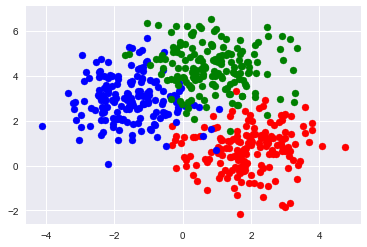

In [4]:
plt.scatter(X[true_labels==1,0], X[true_labels==1,1],c = 'r')
plt.hold
plt.scatter(X[true_labels==2,0], X[true_labels==2,1],c = 'b')
plt.hold
plt.scatter(X[true_labels==0,0], X[true_labels==0,1],c = 'g')

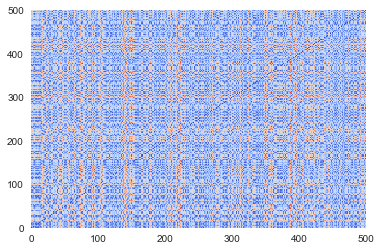

In [5]:
euclidean_dists = metrics.euclidean_distances(X)
plt.pcolor(euclidean_dists,cmap=plt.cm.coolwarm)

##Clustering##

scikit-learn has a huge set of tools for unsupervised learning generally, and clustering specifically.
These are in sklearn.cluster. http://scikit-learn.org/stable/modules/clustering.html

There are 3 functions in all the clustering classes,
<ul>
<li> fit(), 
<li> predict(),
<li> fit_predict(). 
</ul>

fit() builds the model from the training data (e.g. for kmeans, it finds the centroids),

predict() assigns labels to the data after building the model, and

fit_predict() does both at the same data (e.g in kmeans, it finds the centroids and assigns the labels to the dataset).

###K-means clustering ###

More on the k-means clustering here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans


In [6]:
import sklearn.cluster as sk_cluster

kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_
error = kmeans.inertia_

print ("The total error of the clustering is: ", error)
print ('\nCluster labels')
print(kmeans_labels)
print ('\n Cluster Centroids')
print (centroids)

The total error of the clustering is:  881.748277487

Cluster labels
[0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 2 0 1 0 0 2 2 1 0 1 2 1 0 1 1 0 0 1 2 2 2
 2 2 2 1 0 0 2 2 0 2 0 1 1 0 0 0 0 1 1 2 2 0 2 2 1 2 2 2 1 2 2 1 0 1 0 0 1
 2 1 2 2 2 0 0 0 1 0 1 2 1 1 1 1 0 0 2 0 1 2 1 0 1 0 2 1 1 0 0 2 0 2 0 2 0
 0 2 1 1 2 1 2 2 1 1 2 0 1 1 0 1 0 1 0 2 0 1 2 0 2 1 1 2 0 0 0 1 2 0 0 0 2
 2 0 2 0 0 0 2 0 1 2 1 0 2 2 1 1 1 2 0 2 0 2 1 1 2 0 0 1 1 2 2 2 2 2 1 1 2
 2 0 2 1 1 1 0 2 2 0 1 2 0 1 2 1 2 0 0 1 2 2 2 1 1 0 2 2 1 1 0 1 0 1 1 2 1
 2 2 0 0 0 2 1 0 0 1 1 2 1 1 0 2 0 0 0 2 2 2 0 1 1 1 1 1 2 1 1 0 1 1 0 2 1
 2 2 0 0 2 2 0 1 2 1 2 2 1 2 0 1 2 0 2 2 2 2 1 2 0 0 0 0 1 1 1 2 1 1 0 0 2
 1 0 1 2 0 2 1 2 0 1 0 2 0 1 2 1 1 0 1 0 2 1 1 0 0 2 0 2 0 0 0 2 0 1 2 2 2
 1 2 2 0 1 1 1 2 1 2 0 0 0 2 0 1 1 2 0 1 1 1 2 2 2 2 1 0 2 1 0 0 0 2 0 1 0
 1 1 0 1 1 1 1 2 2 1 2 0 1 0 1 0 0 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 2 1 1 0 2
 1 2 1 0 0 1 2 2 0 0 2 1 1 0 1 2 0 1 0 2 0 1 0 0 2 0 0 0 0 2 0 2 1 2 1 0 1
 2 1 2 1 2 0 1 2 2 2 2 2 0 1 2 

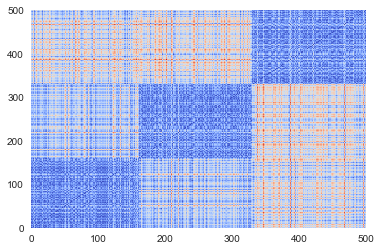

In [7]:
idx = np.argsort(kmeans_labels) # returns the indices in sorted order
rX = X[idx,:]
r_euclid = metrics.euclidean_distances(rX)
#r_euclid = euclidean_dists[idx,:][:,idx]
plt.pcolor(r_euclid,cmap=plt.cm.coolwarm)

Confusion matrix: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Homogeneity and completeness: http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness

Precision: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

Recall: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

[[151  12   4]
 [  2   3 162]
 [  9 154   3]]


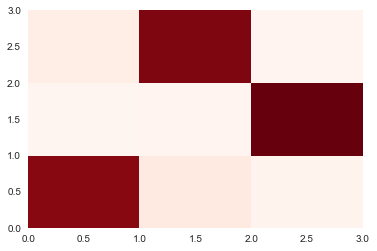

In [8]:
C= metrics.confusion_matrix(true_labels,kmeans_labels)
print (C)
#plt.pcolor(C,cmap=plt.cm.coolwarm)
plt.pcolor(C,cmap=plt.cm.Reds)

In [9]:
p = metrics.precision_score(true_labels,kmeans_labels, average=None)
print(p)
r = metrics.recall_score(true_labels,kmeans_labels, average = None)
print(r)

[ 0.93209877  0.01775148  0.01775148]
[ 0.90419162  0.01796407  0.01807229]


[0, 2, 1]
[[151   4  12]
 [  2 162   3]
 [  9   3 154]]


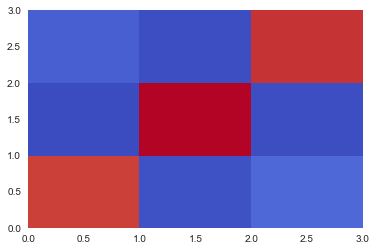

In [10]:
mapping = list(np.argmax(C,axis=0))
print(mapping)
mapped_kmeans_labels = [0 for i in range(len(kmeans_labels))]
for i in range(len(kmeans_labels)):
    mapped_kmeans_labels[i] = mapping[kmeans_labels[i]]
    
C2= metrics.confusion_matrix(true_labels,mapped_kmeans_labels)
print (C2)
#plt.pcolor(C,cmap=plt.cm.coolwarm)
plt.pcolor(C2,cmap=plt.cm.coolwarm) 
C = C2

In [11]:
h = metrics.homogeneity_score(true_labels,kmeans_labels)
print(h)
c = metrics.completeness_score(true_labels,kmeans_labels)
print(c)
v = metrics.v_measure_score(true_labels,kmeans_labels)
print(v)
p = metrics.precision_score(true_labels,mapped_kmeans_labels, average=None)
print(p)
r = metrics.recall_score(true_labels,mapped_kmeans_labels, average = None)
print(r)
p = metrics.precision_score(true_labels,mapped_kmeans_labels, average='weighted')
print(p)
r = metrics.recall_score(true_labels,mapped_kmeans_labels, average = 'weighted')
print(r)

0.749703757499
0.749835439427
0.749769592681
[ 0.93209877  0.95857988  0.9112426 ]
[ 0.90419162  0.97005988  0.92771084]
0.934019212506
0.934


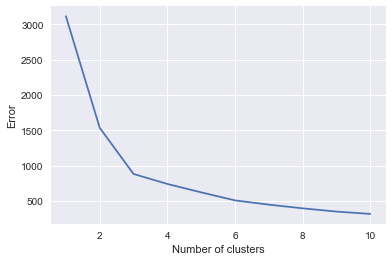

In [12]:
error = np.zeros(11)
error[0] = 0;
for k in range(1,11):
    kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(X)
    error[k] = kmeans.inertia_

plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('Error')

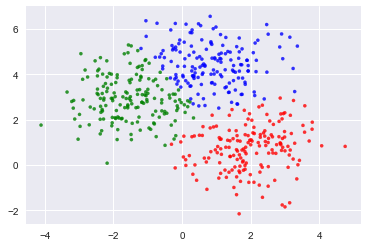

In [13]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[kmeans_labels].tolist(), s=10, alpha=0.8)

###Agglomerative Clustering###

More on Agglomerative Clustering here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

[[ 12  23 132]
 [159   7   1]
 [  3 149  14]]


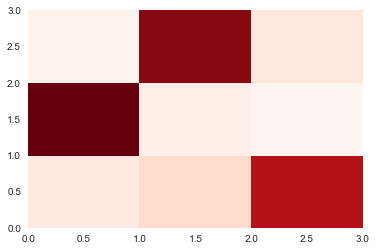

In [14]:
agglo = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 3)
agglo_labels = agglo.fit_predict(X)

C_agglo= metrics.confusion_matrix(true_labels,agglo_labels)
print (C_agglo)
#plt.pcolor(C_agglo,cmap=plt.cm.coolwarm)
plt.pcolor(C_agglo,cmap=plt.cm.Reds)

Another way to do agglomerative clustering using SciPy:
    
https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

In [15]:
import scipy.cluster.hierarchy as hr

Z = hr.linkage(X, method='complete', metric='euclidean')

print (Z.shape, X.shape)

(499, 4) (500, 2)


In [16]:
import scipy.spatial.distance as sp_dist
D = sp_dist.pdist(X, 'euclidean') 
Z = hr.linkage(D, method='complete')
print (Z.shape, X.shape)

(499, 4) (500, 2)


Hierarchical clustering returns a 4 by (n-1) matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the n original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


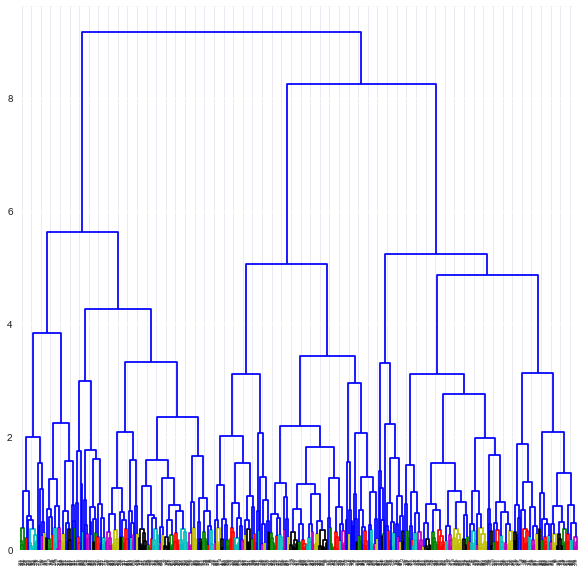

In [17]:
fig = plt.figure(figsize=(10,10))
T = hr.dendrogram(Z,color_threshold=0.4, leaf_font_size=4)
fig.show()

Another way to do agglomerative clustering (and visualizing it):
http://seaborn.pydata.org/generated/seaborn.clustermap.html

[56, 199, 237, 179, 233, 358, 303, 452, 143, 478, 147, 440, 74, 223, 16, 388, 467, 267, 451, 44, 406, 290, 201, 422, 92, 100, 60, 107, 342, 356, 269, 458, 327, 393, 275, 165, 277, 135, 272, 117, 301, 227, 95, 172, 193, 37, 444, 310, 414, 279, 332, 57, 484, 21, 26, 46, 350, 184, 488, 192, 264, 340, 78, 489, 66, 178, 448, 220, 408, 160, 180, 499, 473, 130, 36, 22, 150, 34, 133, 177, 118, 181, 436, 109, 307, 380, 76, 241, 263, 455, 260, 167, 295, 446, 470, 169, 316, 400, 462, 38, 62, 242, 334, 476, 250, 417, 243, 402, 77, 321, 196, 475, 257, 85, 361, 67, 377, 378, 413, 481, 115, 323, 431, 63, 357, 206, 112, 471, 335, 105, 482, 212, 280, 205, 211, 438, 183, 96, 443, 447, 2, 55, 329, 291, 490, 379, 249, 374, 114, 120, 450, 87, 163, 268, 30, 287, 25, 119, 128, 441, 219, 311, 333, 13, 88, 302, 337, 348, 93, 479, 141, 286, 483, 363, 411, 234, 486, 170, 200, 309, 4, 457, 463, 382, 124, 373, 82, 421, 176, 228, 164, 248, 48, 288, 162, 318, 235, 459, 126, 370, 182, 190, 213, 466, 396, 11, 116, 7, 

C:\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


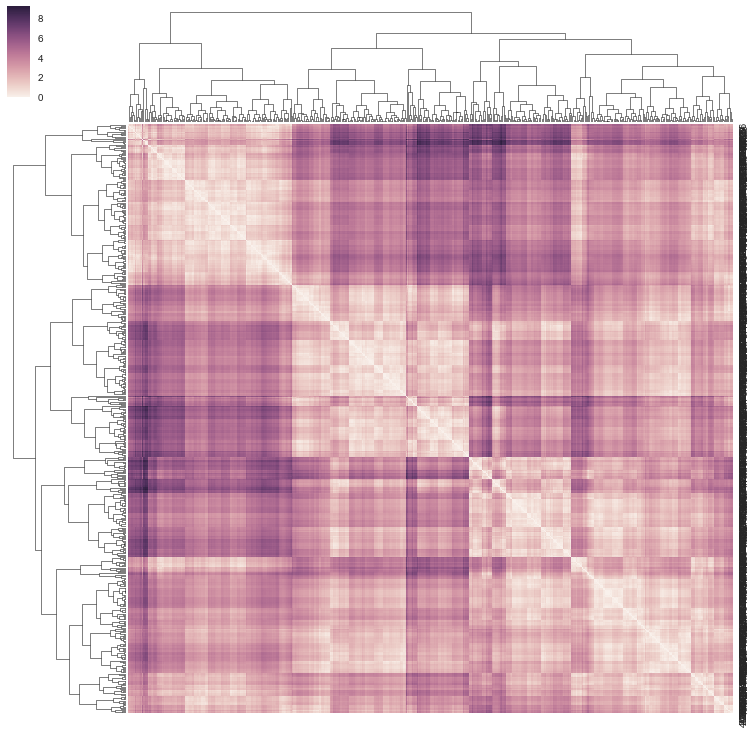

In [18]:
distances = metrics.euclidean_distances(X)
cg = sns.clustermap(distances, method="complete", figsize=(13,13), xticklabels=False)
print (cg.dendrogram_col.reordered_ind)

###DBSCAN Algorithm ###

More on DBSCAN here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [19]:
dbscan = sk_cluster.DBSCAN(eps=0.3)
dbscan_labels = dbscan.fit_predict(X)
print(dbscan_labels)
C = metrics.confusion_matrix(true_labels,dbscan.labels_)
print (C)

[ 0  3  1 -1  2  0 -1  2  3  6  3  2 -1  4  0 -1 -1 -1  3  0 -1  5  5  3  6
  7  5 -1  0  3  7 -1  9 -1  5 -1  5  5  5 -1  3  0 -1  8 -1 -1  5 -1  3 -1
  0  0  0  0 -1  1 -1  5  0 -1 -1  0  5  5 -1 -1 -1  5  0  0  3 -1 -1  3 -1
  2  5  5  5 -1 -1 -1  3  0 -1 -1  3 -1  4  3  0  0 -1 -1  0  5 -1  0  0  0
 -1  3 -1  0 -1 -1  0 -1  0  5  0  0 -1  0  1  5  2  5  5  7  1 -1  0 -1  3
  6  3  0 -1 -1  5  0  3  5  0  5  3  3 -1 -1 -1  2  3 -1 -1  0  0 -1 -1 -1
  5 -1 -1  0  8 -1  0 -1  0 -1  5 -1  1  1  3  5  0  5  2  5  2  3  5  0  0
  2  3  5  5 -1  5  5  3 -1  5 -1  0  8  0  3  3  0  5  5  0  3  5  0  3  5
  2 -1  6  9  3 -1 -1 -1 -1  3  0 -1 -1  3  3  0 -1 -1  1  4  5 -1 -1 -1 -1
 -1  0  5  3 -1  0  3  0 -1  2  3  6  5  0  0 -1  5  5  5  0  3  3  3  3  1
  5  3  3  0 -1  3  9 -1  3 -1  5  0  0  5  5  0  0 -1  7  5 -1 -1  5  0  0
  5  0  5 -1  5 -1 -1 -1  0 -1 -1  2  7  3 -1 -1  1  3 -1  0  5  3  0  3 -1
 -1  5  4 -1 -1  3  9  5  0  2  5  4 -1 -1  0  0  5  3  3  0 -1  5  0  5 -1
 -1  6  5  0

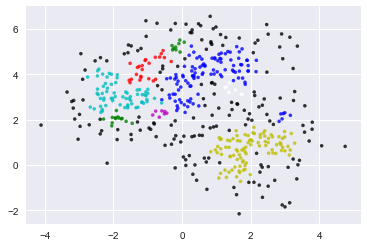

In [20]:
#colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
#colors = np.hstack([colors] * 20)
colors = np.array([x for x in 'bgrcmywk'*10])
plt.scatter(X[:, 0], X[:, 1], color=colors[dbscan_labels].tolist(), s=10, alpha=0.8)

##Processing Complex Data##

So far we have assumed that the intput is in the form of numerical vectors to which we can apply directly the algorithms we have. Often the data will be more complex. For example what if we want to cluster categorical data, itemsets, or text? Python provides libraries for processing the data and transforming them to a format that we can use.

Python offers a set of tools for extracting features:http://scikit-learn.org/stable/modules/feature_extraction.html

###DictVectorizer###

The DictVectorizer feature extraction: 
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html#sklearn.feature_extraction.DictVectorizer

The DictVectorizer takes a dictionary of attribute-value pairs and transforms them into numerical vectors. Real values are preserved, while categorical attributes are transformed into binary. The vectorizer produces a *sparse representation*.

In [21]:
measurements = [
{'city': 'Dubai', 'temperature': 33.},
{'city': 'London', 'temperature': 12.},
{'city': 'San Fransisco', 'temperature': 18.},
]
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
print(vec.fit_transform(measurements).toarray())
vec.get_feature_names()

[[  1.   0.   0.  33.]
 [  0.   1.   0.  12.]
 [  0.   0.   1.  18.]]


['city=Dubai', 'city=London', 'city=San Fransisco', 'temperature']

In [22]:
measurements = [
    {'refund' : 'No','marital_status': 'married', 'income' : 100},
    {'refund' : 'Yes','marital_status': 'single', 'income' : 120},
    {'refund' : 'No','marital_status':'divorced', 'income' : 80},
]
vec = DictVectorizer()
print(vec.fit_transform(measurements))
vec.get_feature_names()

  (0, 0)	100.0
  (0, 2)	1.0
  (0, 4)	1.0
  (1, 0)	120.0
  (1, 3)	1.0
  (1, 5)	1.0
  (2, 0)	80.0
  (2, 1)	1.0
  (2, 4)	1.0


['income',
 'marital_status=divorced',
 'marital_status=married',
 'marital_status=single',
 'refund=No',
 'refund=Yes']

###Text processing###

Feature extraction from text:
http://scikit-learn.org/stable/modules/classes.html#text-feature-extraction-ref

SciKit datasets: http://scikit-learn.org/stable/datasets/

We will use the 20-newsgroups datasets which consists of postings on 20 different newsgroups. 

More information here: http://scikit-learn.org/stable/datasets/#the-20-newsgroups-text-dataset 


In [23]:
categories = ['alt.atheism', 'sci.space','rec.sport.baseball']
news_data = sk_data.fetch_20newsgroups(subset='train', 
                               remove=('headers', 'footers', 'quotes'),
                               categories=categories)
#print (news_data.target, len(news_data.target))
print (news_data.target_names)

['alt.atheism', 'rec.sport.baseball', 'sci.space']


In [25]:
print (type(news_data))
print (news_data.filenames)
print (news_data.target[:10])
print (news_data.data[0])
print (len(news_data.data))

<class 'sklearn.datasets.base.Bunch'>
[ 'C:\\Users\\Panayiotis\\scikit_learn_data\\20news_home\\20news-bydate-train\\alt.atheism\\53136'
 'C:\\Users\\Panayiotis\\scikit_learn_data\\20news_home\\20news-bydate-train\\alt.atheism\\51300'
 'C:\\Users\\Panayiotis\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\61216'
 ...,
 'C:\\Users\\Panayiotis\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.sport.baseball\\104509'
 'C:\\Users\\Panayiotis\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.sport.baseball\\105103'
 'C:\\Users\\Panayiotis\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\60225']
[0 0 2 1 1 2 1 0 2 0]

That's okay:  it's what all the rest of them who come on here say...


This isn't the guy who was a lawyer was he?  Could you give more info on this
guy (never mind- I'm sure there will be PLENTY of responses to this post, and
it will appear there)


This is true.  Make sure it is true for ALL cases.
  

Why not both?  ;)
 

Why 

###CountVectorizer###

The CountVectorizer can be used to extract features in the form of bag of words. It is typically used for text, but you could use it to represent also a collection of itemsets (where each itemset will become a word).

In [24]:
import sklearn.feature_extraction.text as sk_text
vectorizer = sk_text.CountVectorizer(min_df=1)
#vectorizer = sk_text.CountVectorizer(min_df=1,stop_words = 'english')

corpus = ['This is the first document.',
           'this is the second second document.',
           'And the third one.',
           'Is this the first document?',
          ]
X = vectorizer.fit_transform(corpus)
print(X.toarray())  
vectorizer.get_feature_names()

[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

###TfIdfVectorizer###

TfIdfVectorizer transforms text into a sparse matrix where rows are text and columns are words, and values are the tf-dif values. It performs tokenization, normalization, and removes stop-words. More here: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

In [25]:
vectorizer = sk_text.TfidfVectorizer(
                            #stop_words='english',
                             #max_features = 1000,
                             min_df=1)
X = vectorizer.fit_transform(corpus)
print(X.toarray())  
print (vectorizer.get_feature_names())

[[ 0.          0.43877674  0.54197657  0.43877674  0.          0.
   0.35872874  0.          0.43877674]
 [ 0.          0.27230147  0.          0.27230147  0.          0.85322574
   0.22262429  0.          0.27230147]
 [ 0.55280532  0.          0.          0.          0.55280532  0.
   0.28847675  0.55280532  0.        ]
 [ 0.          0.43877674  0.54197657  0.43877674  0.          0.
   0.35872874  0.          0.43877674]]
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [26]:
vectorizer = sk_text.TfidfVectorizer(stop_words='english',
                             #max_features = 1000,
                             min_df=4, max_df=0.8)
data = vectorizer.fit_transform(news_data.data)
print(type(data))

<class 'scipy.sparse.csr.csr_matrix'>


##Clustering text data##

An example of what we want to do:
http://scikit-learn.org/stable/auto_examples/text/document_clustering.html

In [27]:
import sklearn.cluster as sk_cluster
k=3
kmeans = sk_cluster.KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeans.fit_predict(data)

array([2, 2, 2, ..., 2, 2, 1])

In [37]:
print("Top terms per cluster:")
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])
    print

Top terms per cluster:
Cluster 0:
 don
 god
 just
 people
 think
 does
 like
 know
 say
 time
Cluster 1:
 year
 team
 game
 games
 runs
 baseball
 good
 hit
 pitching
 think
Cluster 2:
 space
 nasa
 launch
 moon
 shuttle
 earth
 orbit
 lunar
 like
 data


In [28]:
C = metrics.confusion_matrix(news_data.target,kmeans.labels_)
print (C)
p = metrics.precision_score(news_data.target,kmeans.labels_, average=None)
print(p)
r = metrics.recall_score(news_data.target,kmeans.labels_, average = None)
print(r)

[[136   1 343]
 [  2   0 595]
 [  1 343 249]]
[ 0.97841727  0.          0.20977254]
[ 0.28333333  0.          0.41989882]


In [29]:
agglo = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 3,)
dense = data.todense()
agglo_labels = agglo.fit_predict(dense) # agglomerative needs dense data

C_agglo= metrics.confusion_matrix(news_data.target,agglo_labels)
print (C_agglo)

[[417   2  61]
 [564   2  31]
 [450  55  88]]


In [30]:
dbscan = sk_cluster.DBSCAN(eps=0.1)
dbscan_labels = dbscan.fit_predict(data)
C = metrics.confusion_matrix(news_data.target,dbscan.labels_)
print (C)

[[  0   0   0   0]
 [468  12   0   0]
 [568  29   0   0]
 [576  17   0   0]]
